In [1]:
import pandas as pd
import cPickle as pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import scipy
from scikits import bootstrap as boot
sns.set(font_scale=1.0)
from pandas.plotting import table
import custom_image_toolkit as c
from scipy.stats import ttest_ind

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

In [4]:
cell_type_index={'M':'Mothers','D':'Daughters'}
# yFB78 raffinose on 190606
expt_id0 = '/190606_yFB78_60X_Raff_125uMGal'
df0 = pd.read_pickle("./expt_ids"+expt_id0+".pkl")
df0['expt'] = expt_id0
df0['label'] = 'pGAL1-WHI5 06/06'
df0['genotype'] = 'pGAL1-WHI5'
# # yFB79 Raffinose experiment on 181207
expt_id1 = '/181207_yFB79_60X_Raff_125uMGal'
df1 = pd.read_pickle("./expt_ids"+expt_id1+".pkl")
df1['expt'] = expt_id1
df1['label'] = 'pWHI5-WHI5 12/07'
df1['genotype'] = 'pWHI5-WHI5'
# yFB79 Raffinose experiment on 190417
expt_id2 = '/190417_yFB79_60X_Raff_125uMGal'
df2= pd.read_pickle("./expt_ids"+expt_id2+".pkl")
df2['expt'] = '/190417_yFB79_60X_Raff_125uMGal'
df2['label'] = 'pWHI5-WHI5 4/17'
df2['genotype'] = 'pWHI5-WHI5'
# yFB78 expt 190607, 12 min timestep
expt_id3 = '/190607_yFB78_60X_Raff_125uMGal'
df3= pd.read_pickle("./expt_ids"+expt_id3+".pkl")
df3['expt'] = '/190607_yFB78_60X_Raff_125uMGal'
df3['label'] = 'pGAL1-WHI5 6/07'
df3['genotype'] = 'pGAL1-WHI5'
# yFB78 expt 190725
expt_id4 = '/190725_yFB78_60X_2Raff_125uMGal'
df4= pd.read_pickle("./expt_ids"+expt_id4+".pkl")
df4['expt'] = expt_id4
df4['label'] = 'pGAL1-WHI5 7/25'
df4['genotype'] = 'pGAL1-WHI5'
# yFB79 Raffinose experiment on 190612
expt_id6 = '/190612_yFB79_timelapse'
df6= pd.read_pickle("./expt_ids"+expt_id6+".pkl")
df6['expt'] = expt_id6
df6['label'] = 'pWHI5-WHI5 6/12'
df6['genotype'] = 'pWHI5-WHI5'
df0=c.processing(df0)
df1=c.processing(df1)
df=df0.append(df1);
df2=c.processing(df2)
df=df.append(df2);
df3=c.processing(df3)
df=df.append(df3);
df4=c.processing(df4)
df=df.append(df4);
df6=c.processing(df6)
df=df.append(df6);
df = c.normalize(df);
df['Cell Type'] = [cell_type_index[df.iloc[i0].type] for i0 in range(len(df))]
df['Condition'] = [cell_type_index[df.iloc[i0].type]+', '+df.iloc[i0].genotype for i0 in range(len(df))]

In [6]:
df.Condition.unique()

array(['Mothers, pGAL1-WHI5', 'Daughters, pGAL1-WHI5',
       'Daughters, pWHI5-WHI5', 'Mothers, pWHI5-WHI5'], dtype=object)

$V_{b,ell}$ $c1_{b,seg,norm}$
pGAL1-WHI5 D
pWHI5-WHI5 D
[[0.04565121983818101, 0.053916386601719206], [-0.4145923808722586, 0.03429971702850177]]
7.202350949895027 0.06390185703421569
CDF for this z value 0.9999999999997041
This is a statistically significant difference


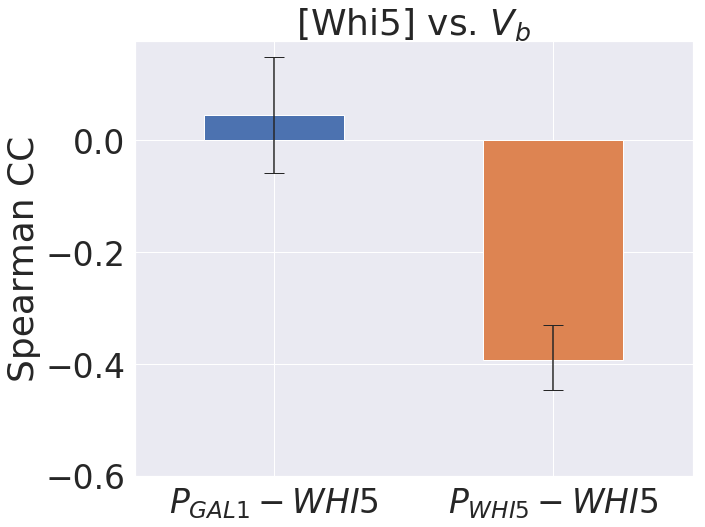

In [7]:
types = ['D']
sns.set(font_scale=3.0)
# plt.figure(figsize=[5,5])
full_types = ['Daughters']
labels = ['pGAL1-WHI5','pWHI5-WHI5']
legends = [r'$P_{GAL1}-WHI5$',r'$P_{WHI5}-WHI5$']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$V_{b,ell}$', '$c1_{b,seg,norm}$'
print x,y
vals = [[],[]]
zvals = []
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(legends[ind])
        v1=df.type==types[ind1]
        v2=df.genotype==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]), scipy.stats.spearmanr,alpha=0.05)
        vals[0].append(scipy.stats.spearmanr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        zvals.append([np.arctanh(vals[0][-1]),1/np.sqrt(len(df[v1 & v2][x])-3)])
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
temp2=np.reshape(np.asarray(vals[1]).transpose(),[1,2,2])
current_palette = sns.color_palette()
plot = temp1.plot(x='label',y='slope',kind='bar',legend=False,yerr=temp2,capsize=10.0, figsize=[10,8],grid=True,rot=False,color=current_palette[:2])
plt.title('[Whi5] vs. $V_b$')
# plt.legend(loc=[0.8,0.4])
# plt.xticks(rotate=False)
plt.xlabel('')
plt.ylim(ymin=-0.6)
plt.ylabel('Spearman CC')
fig=plot.get_figure()
ax=plt.gca()
print zvals  # these are the normally distributed pearson correlation coefficients
zobs=(zvals[0][0]-zvals[1][0])/(np.sqrt(zvals[0][1]**2+zvals[1][1]**2))
print zobs, np.sqrt(zvals[0][1]**2+zvals[1][1]**2)
print 'CDF for this z value', scipy.stats.norm.cdf(zobs)
if 0.025<scipy.stats.norm.cdf(zobs)<0.975:
    print 'This is not statistically significant'
else:
#     props = {'connectionstyle':'bar','arrowstyle':'-',\
#                  'shrinkA':20,'shrinkB':20,'linewidth':2}
#     ax.annotate('', xy=(0.0,0.5), xytext=(0.0,0.5), arrowprops=props)
    print 'This is a statistically significant difference'
plt.show()
save_path = '/mnt/c/Users/felix/Dropbox/19_whi5_dilution_paper/plots'
fig.savefig(save_path+'/correlations_perturbation/c1b_vb_corr_full_timelapse_spearman.png',bbox_inches='tight', dpi=500)

$V_{b,ell}$ $\Delta V_{G1,ell}$
pGAL1-WHI5 D
pWHI5-WHI5 D
[[-0.26029441910191464, 0.053916386601719206], [-0.224954798736097, 0.03429971702850177]]
-0.5530296302170898 0.06390185703421569
CDF for this z value 0.2901215604645695
This is not statistically significant


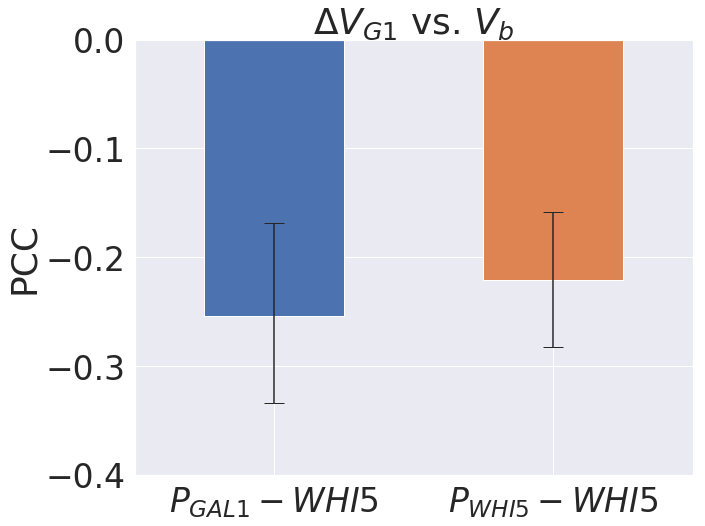

In [22]:
types = ['D']
sns.set(font_scale=3.0)
# plt.figure(figsize=[5,5])
full_types = ['Daughters']
labels = ['pGAL1-WHI5','pWHI5-WHI5']
legends = [r'$P_{GAL1}-WHI5$',r'$P_{WHI5}-WHI5$']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$V_{b,ell}$', '$\Delta V_{G1,ell}$'
print x,y
vals = [[],[]]
zvals = []
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(legends[ind])
        v1=df.type==types[ind1]
        v2=df.genotype==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]), scipy.stats.pearsonr,alpha=0.05)
        vals[0].append(scipy.stats.pearsonr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        zvals.append([np.arctanh(vals[0][-1]),1/np.sqrt(len(df[v1 & v2][x])-3)])
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
temp2=np.reshape(np.asarray(vals[1]).transpose(),[1,2,2])
plot = temp1.plot(x='label',y='slope',kind='bar',legend=False,yerr=temp2,capsize=10.0, figsize=[10,8],grid=True,rot=False)
plt.title(r'$\Delta V_{G1}$ vs. $V_b$')
# plt.legend(loc=[0.8,0.4])
# plt.xticks(rotate=False)
plt.xlabel('')
plt.ylim(ymin=-0.4)
plt.ylabel('PCC')
fig=plot.get_figure()
ax=plt.gca()
print zvals  # these are the normally distributed pearson correlation coefficients
zobs=(zvals[0][0]-zvals[1][0])/(np.sqrt(zvals[0][1]**2+zvals[1][1]**2))
print zobs, np.sqrt(zvals[0][1]**2+zvals[1][1]**2)
print 'CDF for this z value', scipy.stats.norm.cdf(zobs)
if 0.025<scipy.stats.norm.cdf(zobs)<0.975:
    print 'This is not statistically significant'
else:
#     props = {'connectionstyle':'bar','arrowstyle':'-',\
#                  'shrinkA':20,'shrinkB':20,'linewidth':2}
#     ax.annotate('', xy=(0.0,0.5), xytext=(0.0,0.5), arrowprops=props)
    print 'This is a statistically significant difference'
plt.show()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/dvG1_vb_corr_full_timelapse.png',bbox_inches='tight', dpi=500)

$V_{s,ell}$ $\Delta V_{budded,ell}$
pGAL1-WHI5 D
pWHI5-WHI5 D
[[0.24585265838391618, 0.053916386601719206], [0.27087921272445875, 0.03429971702850177]]
-0.3916404859273858 0.06390185703421569
CDF for this z value 0.3476619346585608
This is not statistically significant


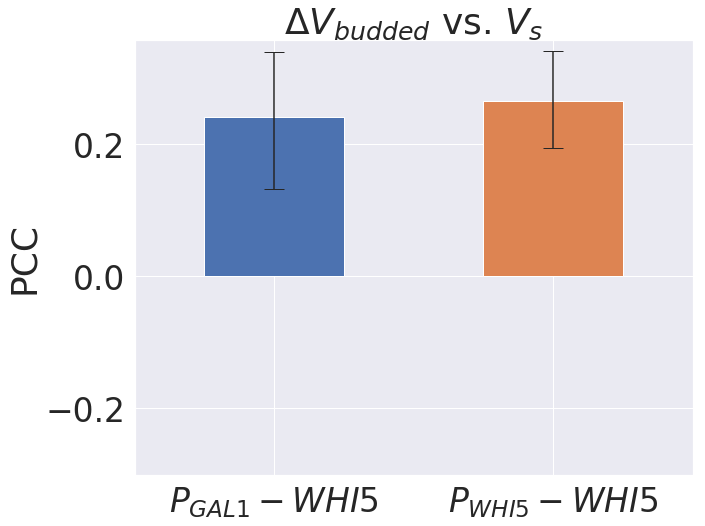

In [23]:
types = ['D']
sns.set(font_scale=3.0)
# plt.figure(figsize=[5,5])
full_types = ['Daughters']
labels = ['pGAL1-WHI5','pWHI5-WHI5']
legends = [r'$P_{GAL1}-WHI5$',r'$P_{WHI5}-WHI5$']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$V_{s,ell}$', '$\Delta V_{budded,ell}$'
print x,y
vals = [[],[]]
zvals = []
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(legends[ind])
        v1=df.type==types[ind1]
        v2=df.genotype==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]), scipy.stats.pearsonr,alpha=0.05)
        vals[0].append(scipy.stats.pearsonr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        zvals.append([np.arctanh(vals[0][-1]),1/np.sqrt(len(df[v1 & v2][x])-3)])
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
temp2=np.reshape(np.asarray(vals[1]).transpose(),[1,2,2])
plot = temp1.plot(x='label',y='slope',kind='bar',legend=False,yerr=temp2,capsize=10.0, figsize=[10,8],grid=True,rot=False)
plt.title(r'$\Delta V_{budded}$ vs. $V_s$')
# plt.legend(loc=[0.8,0.4])
# plt.xticks(rotate=False)
plt.xlabel('')
plt.ylim(ymin=-0.3)
plt.ylabel('PCC')
fig=plot.get_figure()
ax=plt.gca()
print zvals  # these are the normally distributed pearson correlation coefficients
zobs=(zvals[0][0]-zvals[1][0])/(np.sqrt(zvals[0][1]**2+zvals[1][1]**2))
print zobs, np.sqrt(zvals[0][1]**2+zvals[1][1]**2)
print 'CDF for this z value', scipy.stats.norm.cdf(zobs)
if 0.025<scipy.stats.norm.cdf(zobs)<0.975:
    print 'This is not statistically significant'
else:
#     props = {'connectionstyle':'bar','arrowstyle':'-',\
#                  'shrinkA':20,'shrinkB':20,'linewidth':2}
#     ax.annotate('', xy=(0.0,0.5), xytext=(0.0,0.5), arrowprops=props)
    print 'This is a statistically significant difference'
plt.show()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/dvbudded_vs_corr_full_timelapse.png',bbox_inches='tight', dpi=500)

$V_{b,ell}$ $\Delta V_{full,ell}$
pGAL1-WHI5 D
pWHI5-WHI5 D
[[-0.11688934452615074, 0.053916386601719206], [-0.10443841467116238, 0.03429971702850177]]
-0.19484456998364877 0.06390185703421569
CDF for this z value 0.4227573145544003
This is not statistically significant


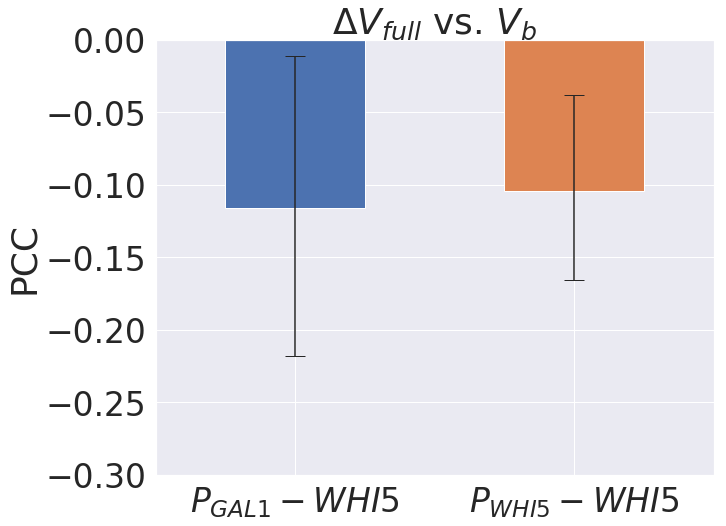

In [24]:
types = ['D']
sns.set(font_scale=3.0)
# plt.figure(figsize=[5,5])
full_types = ['Daughters']
labels = ['pGAL1-WHI5','pWHI5-WHI5']
legends = [r'$P_{GAL1}-WHI5$',r'$P_{WHI5}-WHI5$']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$V_{b,ell}$', '$\Delta V_{full,ell}$'
print x,y
vals = [[],[]]
zvals = []
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(legends[ind])
        v1=df.type==types[ind1]
        v2=df.genotype==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]), scipy.stats.pearsonr,alpha=0.05)
        vals[0].append(scipy.stats.pearsonr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        zvals.append([np.arctanh(vals[0][-1]),1/np.sqrt(len(df[v1 & v2][x])-3)])
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
temp2=np.reshape(np.asarray(vals[1]).transpose(),[1,2,2])
plot = temp1.plot(x='label',y='slope',kind='bar',legend=False,yerr=temp2,capsize=10.0, figsize=[10,8],grid=True,rot=False)
plt.title(r'$\Delta V_{full}$ vs. $V_b$')
# plt.legend(loc=[0.8,0.4])
# plt.xticks(rotate=False)
plt.xlabel('')
plt.ylim(ymin=-0.3)
plt.ylabel('PCC')
fig=plot.get_figure()
ax=plt.gca()
print zvals  # these are the normally distributed pearson correlation coefficients
zobs=(zvals[0][0]-zvals[1][0])/(np.sqrt(zvals[0][1]**2+zvals[1][1]**2))
print zobs, np.sqrt(zvals[0][1]**2+zvals[1][1]**2)
print 'CDF for this z value', scipy.stats.norm.cdf(zobs)
if 0.025<scipy.stats.norm.cdf(zobs)<0.975:
    print 'This is not statistically significant'
else:
#     props = {'connectionstyle':'bar','arrowstyle':'-',\
#                  'shrinkA':20,'shrinkB':20,'linewidth':2}
#     ax.annotate('', xy=(0.0,0.5), xytext=(0.0,0.5), arrowprops=props)
    print 'This is a statistically significant difference'
plt.show()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/dvfull_vb_corr_full_timelapse.png',bbox_inches='tight', dpi=500)

$V_{b,ell}$ $c1_{b,seg}$
pGAL1-WHI5 D
pWHI5-WHI5 D
[[-0.023074704588427968, 0.053916386601719206], [-0.42726704043564323, 0.03429971702850177]]
6.325204847032755 0.06390185703421569
CDF for this z value 0.9999999998735516
This is a statistically significant difference


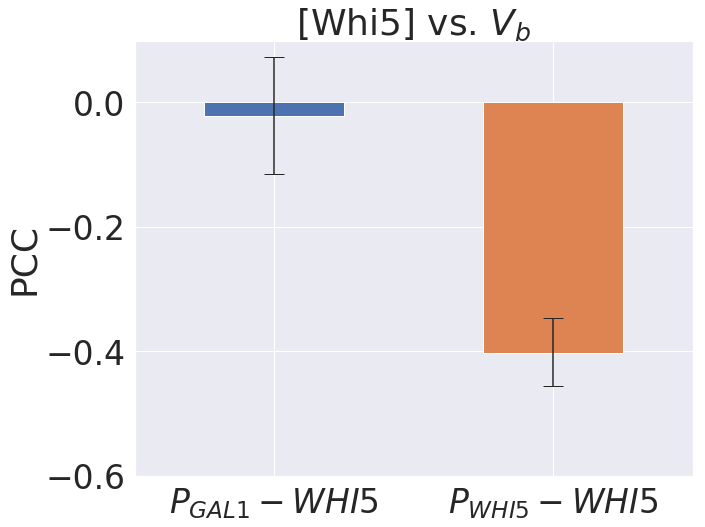

In [20]:
types = ['D']
sns.set(font_scale=3.0)
# plt.figure(figsize=[5,5])
full_types = ['Daughters']
labels = ['pGAL1-WHI5','pWHI5-WHI5']
legends = [r'$P_{GAL1}-WHI5$',r'$P_{WHI5}-WHI5$']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$V_{b,ell}$', '$c1_{b,seg}$'
print x,y
vals = [[],[]]
zvals = []
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(legends[ind])
        v1=df.type==types[ind1]
        v2=df.genotype==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]), scipy.stats.pearsonr,alpha=0.05)
        vals[0].append(scipy.stats.pearsonr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        zvals.append([np.arctanh(vals[0][-1]),1/np.sqrt(len(df[v1 & v2][x])-3)])
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
temp2=np.reshape(np.asarray(vals[1]).transpose(),[1,2,2])
current_palette = sns.color_palette()
plot = temp1.plot(x='label',y='slope',kind='bar',legend=False,yerr=temp2,capsize=10.0, figsize=[10,8],grid=True,rot=False,color=current_palette[:2])
plt.title('[Whi5] vs. $V_b$')
# plt.legend(loc=[0.8,0.4])
# plt.xticks(rotate=False)
plt.xlabel('')
plt.ylim(ymin=-0.6)
plt.ylabel('PCC')
fig=plot.get_figure()
ax=plt.gca()
print zvals  # these are the normally distributed pearson correlation coefficients
zobs=(zvals[0][0]-zvals[1][0])/(np.sqrt(zvals[0][1]**2+zvals[1][1]**2))
print zobs, np.sqrt(zvals[0][1]**2+zvals[1][1]**2)
print 'CDF for this z value', scipy.stats.norm.cdf(zobs)
if 0.025<scipy.stats.norm.cdf(zobs)<0.975:
    print 'This is not statistically significant'
else:
#     props = {'connectionstyle':'bar','arrowstyle':'-',\
#                  'shrinkA':20,'shrinkB':20,'linewidth':2}
#     ax.annotate('', xy=(0.0,0.5), xytext=(0.0,0.5), arrowprops=props)
    print 'This is a statistically significant difference'
plt.show()
fig.savefig(save_path+'/correlations_perturbation/c1b_vb_corr_full_timelapse.png',bbox_inches='tight', dpi=500)

$V_{b,ell}$ $c2_{b,seg,norm}$
pGAL1-WHI5 D
pWHI5-WHI5 D
[[0.08659010478387397, 0.053916386601719206], [0.14066595151202102, 0.03429971702850177]]
0.846232789435096 0.06390185703421569
CDF for this z value 0.8012885532903589
This is not statistically significant


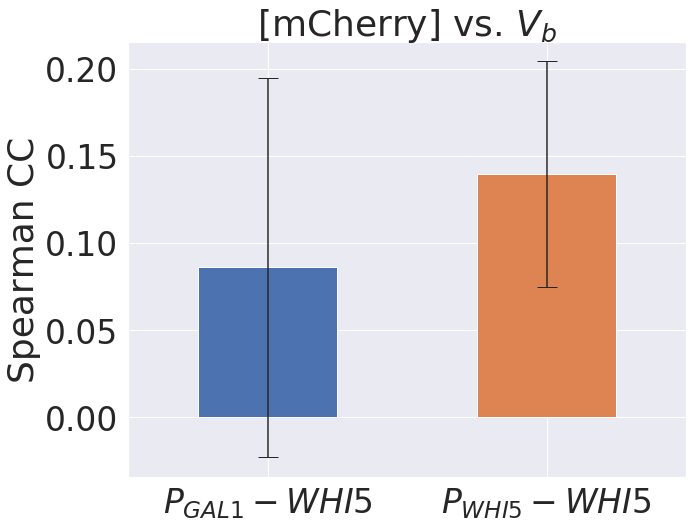

In [11]:
types = ['D']
sns.set(font_scale=3.0)
# plt.figure(figsize=[5,5])
full_types = ['Daughters']
labels = ['pGAL1-WHI5','pWHI5-WHI5']
legends = [r'$P_{GAL1}-WHI5$',r'$P_{WHI5}-WHI5$']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$V_{b,ell}$', '$c2_{b,seg,norm}$'
print x,y
vals = [[],[]]
zvals = []
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(legends[ind])
        v1=df.type==types[ind1]
        v2=df.genotype==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]), scipy.stats.spearmanr,alpha=0.05)
        vals[0].append(scipy.stats.spearmanr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        zvals.append([np.arctanh(vals[0][-1]),1/np.sqrt(len(df[v1 & v2][x])-3)])
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
temp2=np.reshape(np.asarray(vals[1]).transpose(),[1,2,2])
plot = temp1.plot(x='label',y='slope',kind='bar',legend=False,yerr=temp2,capsize=10.0, figsize=[10,8],grid=True,rot=False,color=current_palette[:2])
plt.title('[mCherry] vs. $V_b$')
# plt.legend(legends,loc=[0.9,0.4])
# plt.xticks([])
plt.xlabel('')
plt.ylabel('Spearman CC')
fig=plot.get_figure()
ax=plt.gca()
print zvals  # these are the normally distributed pearson correlation coefficients
zobs=np.absolute((zvals[0][0]-zvals[1][0])/(np.sqrt(zvals[0][1]**2+zvals[1][1]**2)))
print zobs, np.sqrt(zvals[0][1]**2+zvals[1][1]**2)
print 'CDF for this z value', scipy.stats.norm.cdf(zobs)
if 0.025<scipy.stats.norm.cdf(zobs)<0.975:
    print 'This is not statistically significant'
else:
#     props = {'connectionstyle':'bar','arrowstyle':'-',\
#                  'shrinkA':20,'shrinkB':20,'linewidth':2}
#     ax.annotate('', xy=(0.0,0.5), xytext=(0.0,0.5), arrowprops=props)
    print 'This is a statistically significant difference'
plt.show()
fig.savefig(save_path+'/correlations_perturbation/c2b_vb_corr_full_timelapse_spearman.png',bbox_inches='tight', dpi=500)

$V_{b,ell}$ $c2_{b,seg,norm}$
pGAL1-WHI5 D
pWHI5-WHI5 D
[[0.08381665633002189, 0.053916386601719206], [0.14043798156628756, 0.03429971702850177]]
0.8860669762061575 0.06390185703421569
CDF for this z value 0.812209281444136
This is not statistically significant


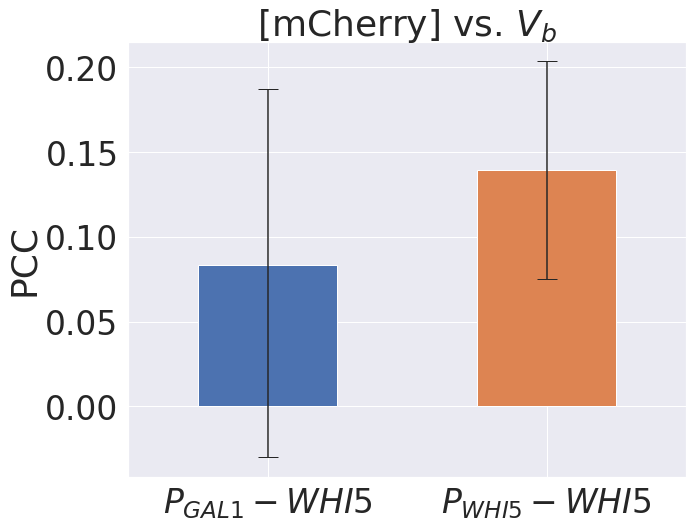

In [12]:
types = ['D']
sns.set(font_scale=3.0)
# plt.figure(figsize=[5,5])
full_types = ['Daughters']
labels = ['pGAL1-WHI5','pWHI5-WHI5']
legends = [r'$P_{GAL1}-WHI5$',r'$P_{WHI5}-WHI5$']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$V_{b,ell}$', '$c2_{b,seg,norm}$'
print x,y
vals = [[],[]]
zvals = []
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(legends[ind])
        v1=df.type==types[ind1]
        v2=df.genotype==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]), scipy.stats.pearsonr,alpha=0.05)
        vals[0].append(scipy.stats.pearsonr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        zvals.append([np.arctanh(vals[0][-1]),1/np.sqrt(len(df[v1 & v2][x])-3)])
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
temp2=np.reshape(np.asarray(vals[1]).transpose(),[1,2,2])
plot = temp1.plot(x='label',y='slope',kind='bar',legend=False,yerr=temp2,capsize=10.0, figsize=[10,8],grid=True,rot=False,color=current_palette[:2])
plt.title('[mCherry] vs. $V_b$')
# plt.legend(legends,loc=[0.9,0.4])
# plt.xticks([])
plt.xlabel('')
plt.ylabel('PCC')
fig=plot.get_figure()
ax=plt.gca()
print zvals  # these are the normally distributed pearson correlation coefficients
zobs=np.absolute((zvals[0][0]-zvals[1][0])/(np.sqrt(zvals[0][1]**2+zvals[1][1]**2)))
print zobs, np.sqrt(zvals[0][1]**2+zvals[1][1]**2)
print 'CDF for this z value', scipy.stats.norm.cdf(zobs)
if 0.025<scipy.stats.norm.cdf(zobs)<0.975:
    print 'This is not statistically significant'
else:
#     props = {'connectionstyle':'bar','arrowstyle':'-',\
#                  'shrinkA':20,'shrinkB':20,'linewidth':2}
#     ax.annotate('', xy=(0.0,0.5), xytext=(0.0,0.5), arrowprops=props)
    print 'This is a statistically significant difference'
plt.show()
fig.savefig(save_path+'/correlations_perturbation/c2b_vb_corr_full_timelapse.png',bbox_inches='tight', dpi=500)

$V_{b,ell}$ $t_{G1}$
pGAL1-WHI5 D
pWHI5-WHI5 D
[[-0.4734087497507419, 0.053916386601719206], [-0.3379589198787415, 0.03429971702850177]]
2.119654046978243 0.06390185703421569
CDF for this z value 0.982982384509849
This is a statistically significant difference


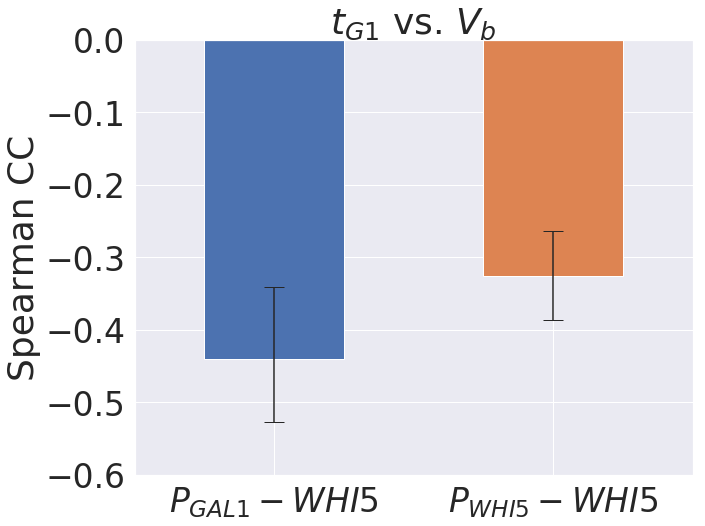

In [132]:
types = ['D']
sns.set(font_scale=3.0)
# plt.figure(figsize=[5,5])
full_types = ['Daughters']
labels = ['pGAL1-WHI5','pWHI5-WHI5']
legends = [r'$P_{GAL1}-WHI5$',r'$P_{WHI5}-WHI5$']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$V_{b,ell}$', '$t_{G1}$'
print x,y
vals = [[],[]]
zvals = []
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(legends[ind])
        v1=df.type==types[ind1]
        v2=df.genotype==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]), scipy.stats.spearmanr,alpha=0.05)
        vals[0].append(scipy.stats.spearmanr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        zvals.append([np.arctanh(vals[0][-1]),1/np.sqrt(len(df[v1 & v2][x])-3)])
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
temp2=np.reshape(np.asarray(vals[1]).transpose(),[1,2,2])
plot = temp1.plot(x='label',y='slope',kind='bar',legend=False,yerr=temp2,capsize=10.0, figsize=[10,8],grid=True,rot=False)
plt.title('$t_{G1}$ vs. $V_b$')
# plt.legend(loc=[0.8,0.4])
# plt.xticks([])
plt.xlabel('')
plt.ylabel('Spearman CC')
plt.ylim(ymin=-0.6)
fig=plot.get_figure()
ax=plt.gca()
print zvals  # these are the normally distributed pearson correlation coefficients
zobs=np.absolute((zvals[0][0]-zvals[1][0])/(np.sqrt(zvals[0][1]**2+zvals[1][1]**2)))
print zobs, np.sqrt(zvals[0][1]**2+zvals[1][1]**2)
print 'CDF for this z value', scipy.stats.norm.cdf(zobs)
if 0.025<scipy.stats.norm.cdf(zobs)<0.975:
    print 'This is not statistically significant'
else:
#     props = {'connectionstyle':'bar','arrowstyle':'-',\
#                  'shrinkA':20,'shrinkB':20,'linewidth':2}
#     ax.annotate('', xy=(0.0,0.5), xytext=(0.0,0.5), arrowprops=props)
    print 'This is a statistically significant difference'
plt.show()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/tg1_vb_corr_full_timelapse_v1_spearman.png',bbox_inches='tight', dpi=500)

$V_{b,ell}$ $t_{G1}$
pGAL1-WHI5 D
pWHI5-WHI5 D
[[-0.4689235364389166, 0.053916386601719206], [-0.3388721330837007, 0.03429971702850177]]
2.0351740839954156 0.06390185703421569
CDF for this z value 0.9790833201277335
This is a statistically significant difference


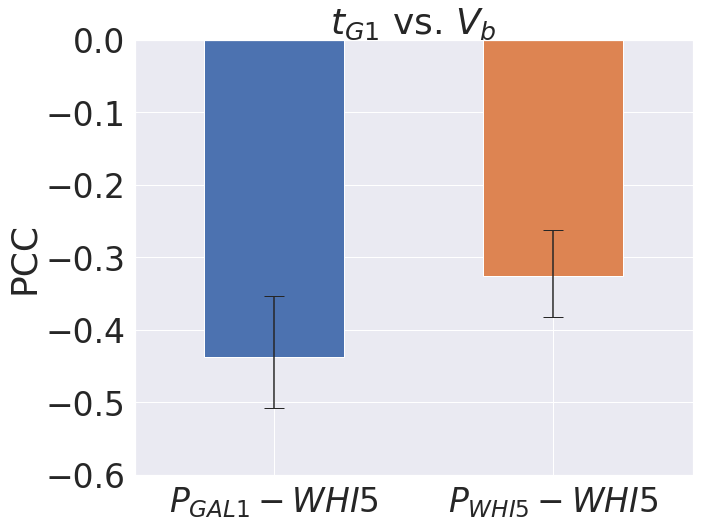

In [19]:
types = ['D']
sns.set(font_scale=3.0)
# plt.figure(figsize=[5,5])
full_types = ['Daughters']
labels = ['pGAL1-WHI5','pWHI5-WHI5']
legends = [r'$P_{GAL1}-WHI5$',r'$P_{WHI5}-WHI5$']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$V_{b,ell}$', '$t_{G1}$'
print x,y
vals = [[],[]]
zvals = []
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(legends[ind])
        v1=df.type==types[ind1]
        v2=df.genotype==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]), scipy.stats.pearsonr,alpha=0.05)
        vals[0].append(scipy.stats.pearsonr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        zvals.append([np.arctanh(vals[0][-1]),1/np.sqrt(len(df[v1 & v2][x])-3)])
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
temp2=np.reshape(np.asarray(vals[1]).transpose(),[1,2,2])
plot = temp1.plot(x='label',y='slope',kind='bar',legend=False,yerr=temp2,capsize=10.0, figsize=[10,8],grid=True,rot=False)
plt.title('$t_{G1}$ vs. $V_b$')
# plt.legend(loc=[0.8,0.4])
# plt.xticks([])
plt.xlabel('')
plt.ylabel('PCC')
plt.ylim(ymin=-0.6)
fig=plot.get_figure()
ax=plt.gca()
print zvals  # these are the normally distributed pearson correlation coefficients
zobs=np.absolute((zvals[0][0]-zvals[1][0])/(np.sqrt(zvals[0][1]**2+zvals[1][1]**2)))
print zobs, np.sqrt(zvals[0][1]**2+zvals[1][1]**2)
print 'CDF for this z value', scipy.stats.norm.cdf(zobs)
if 0.025<scipy.stats.norm.cdf(zobs)<0.975:
    print 'This is not statistically significant'
else:
#     props = {'connectionstyle':'bar','arrowstyle':'-',\
#                  'shrinkA':20,'shrinkB':20,'linewidth':2}
#     ax.annotate('', xy=(0.0,0.5), xytext=(0.0,0.5), arrowprops=props)
    print 'This is a statistically significant difference'
plt.show()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/tg1_vb_corr_full_timelapse_v1.png',bbox_inches='tight', dpi=500)

$V_{s,ell}$ $t_{budded}$
pGAL1-WHI5 D
pWHI5-WHI5 D
[[-0.2727062490066744, 0.053916386601719206], [-0.0792262144015869, 0.03429971702850177]]
-3.0277685748864904 0.06390185703421569
CDF for this z value 0.0012318334037870473
This is a statistically significant difference


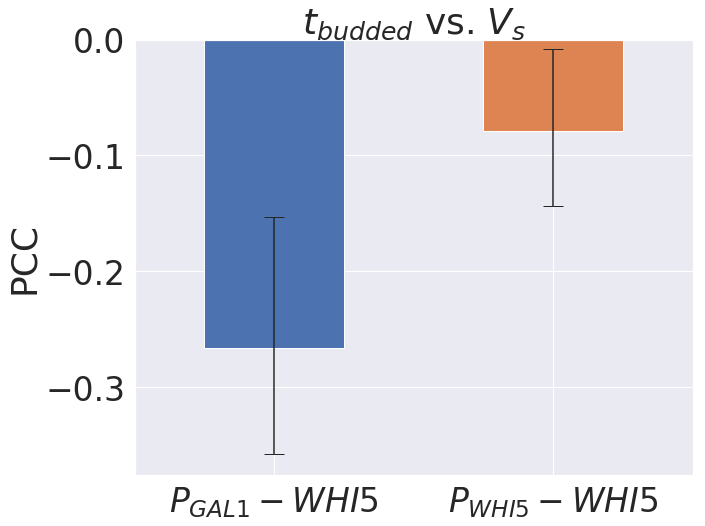

In [20]:
types = ['D']
sns.set(font_scale=3.0)
# plt.figure(figsize=[5,5])
full_types = ['Daughters']
labels = ['pGAL1-WHI5','pWHI5-WHI5']
legends = [r'$P_{GAL1}-WHI5$',r'$P_{WHI5}-WHI5$']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$V_{s,ell}$', '$t_{budded}$'
print x,y
vals = [[],[]]
zvals = []
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(legends[ind])
        v1=df.type==types[ind1]
        v2=df.genotype==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]), scipy.stats.pearsonr,alpha=0.05)
        vals[0].append(scipy.stats.pearsonr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        zvals.append([np.arctanh(vals[0][-1]),1/np.sqrt(len(df[v1 & v2][x])-3)])
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
temp2=np.reshape(np.asarray(vals[1]).transpose(),[1,2,2])
plot = temp1.plot(x='label',y='slope',kind='bar',legend=False,yerr=temp2,capsize=10.0, figsize=[10,8],grid=True,rot=False)
plt.title('$t_{budded}$ vs. $V_s$')
# plt.legend(loc=[0.8,0.4])
# plt.xticks([])
plt.xlabel('')
plt.ylabel('PCC')
fig=plot.get_figure()
ax=plt.gca()
print zvals  # these are the normally distributed pearson correlation coefficients
zobs=(zvals[0][0]-zvals[1][0])/(np.sqrt(zvals[0][1]**2+zvals[1][1]**2))
print zobs, np.sqrt(zvals[0][1]**2+zvals[1][1]**2)
print 'CDF for this z value', scipy.stats.norm.cdf(zobs)
if 0.025<scipy.stats.norm.cdf(zobs)<0.975:
    print 'This is not statistically significant'
else:
#     props = {'connectionstyle':'bar','arrowstyle':'-',\
#                  'shrinkA':20,'shrinkB':20,'linewidth':2}
#     ax.annotate('', xy=(0.0,0.5), xytext=(0.0,0.5), arrowprops=props)
    print 'This is a statistically significant difference'
plt.show()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/tbudded_vs_corr_full_timelapse.png',bbox_inches='tight', dpi=500)

$V_{s,ell}$ $t_{budded}$
pGAL1-WHI5 D
pWHI5-WHI5 D
[[-0.4986728298684996, 0.053916386601719206], [-0.1436006864595375, 0.03429971702850177]]
-5.5565230791155535 0.06390185703421569
CDF for this z value 1.3760067398486576e-08
This is a statistically significant difference


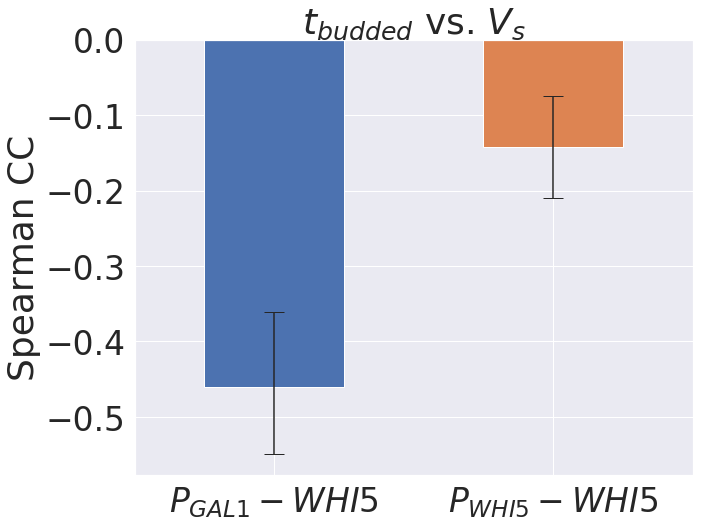

In [135]:
types = ['D']
sns.set(font_scale=3.0)
# plt.figure(figsize=[5,5])
full_types = ['Daughters']
labels = ['pGAL1-WHI5','pWHI5-WHI5']
legends = [r'$P_{GAL1}-WHI5$',r'$P_{WHI5}-WHI5$']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$V_{s,ell}$', '$t_{budded}$'
print x,y
vals = [[],[]]
zvals = []
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(legends[ind])
        v1=df.type==types[ind1]
        v2=df.genotype==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]), scipy.stats.spearmanr,alpha=0.05)
        vals[0].append(scipy.stats.spearmanr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        zvals.append([np.arctanh(vals[0][-1]),1/np.sqrt(len(df[v1 & v2][x])-3)])
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
temp2=np.reshape(np.asarray(vals[1]).transpose(),[1,2,2])
plot = temp1.plot(x='label',y='slope',kind='bar',legend=False,yerr=temp2,capsize=10.0, figsize=[10,8],grid=True,rot=False)
plt.title('$t_{budded}$ vs. $V_s$')
# plt.legend(loc=[0.8,0.4])
# plt.xticks([])
plt.xlabel('')
plt.ylabel('Spearman CC')
fig=plot.get_figure()
ax=plt.gca()
print zvals  # these are the normally distributed pearson correlation coefficients
zobs=(zvals[0][0]-zvals[1][0])/(np.sqrt(zvals[0][1]**2+zvals[1][1]**2))
print zobs, np.sqrt(zvals[0][1]**2+zvals[1][1]**2)
print 'CDF for this z value', scipy.stats.norm.cdf(zobs)
if 0.025<scipy.stats.norm.cdf(zobs)<0.975:
    print 'This is not statistically significant'
else:
#     props = {'connectionstyle':'bar','arrowstyle':'-',\
#                  'shrinkA':20,'shrinkB':20,'linewidth':2}
#     ax.annotate('', xy=(0.0,0.5), xytext=(0.0,0.5), arrowprops=props)
    print 'This is a statistically significant difference'
plt.show()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/tbudded_vs_corr_full_timelapse_spearman.png',bbox_inches='tight', dpi=500)

$V_{b,ell}$ $V_{div,ell}$
pGAL1-WHI5 D
pWHI5-WHI5 D
[[0.30019358144643177, 0.053916386601719206], [0.22886668715858438, 0.03429971702850177]]
1.1161943893063393 0.06390185703421569
0.8678305321855286
This is not statistically significant


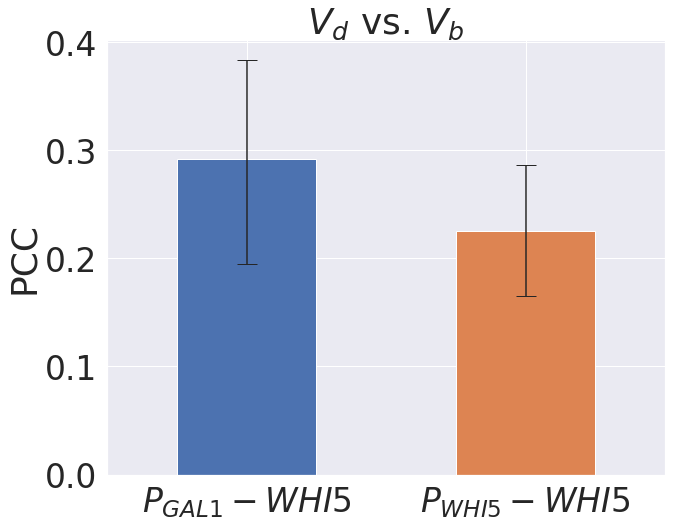

In [21]:
types = ['D']
sns.set(font_scale=3.0)
# plt.figure(figsize=[5,5])
full_types = ['Daughters']
labels = ['pGAL1-WHI5','pWHI5-WHI5']
legends = [r'$P_{GAL1}-WHI5$',r'$P_{WHI5}-WHI5$']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$V_{b,ell}$', '$V_{div,ell}$'
print x,y
vals = [[],[]]
zvals = []
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(legends[ind])
        v1=df.type==types[ind1]
        v2=df.genotype==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]), scipy.stats.pearsonr,alpha=0.05)
        vals[0].append(scipy.stats.pearsonr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        zvals.append([np.arctanh(vals[0][-1]),1/np.sqrt(len(df[v1 & v2][x])-3)])
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
temp2=np.reshape(np.asarray(vals[1]).transpose(),[1,2,2])
plot = temp1.plot(x='label',y='slope',kind='bar',legend=False,yerr=temp2,capsize=10.0, figsize=[10,8],grid=True,rot=False)
plt.title('$V_{d}$ vs. $V_b$')
# plt.legend(loc=[0.8,0.4])
# plt.xticks([])
plt.xlabel('')
plt.ylabel('PCC')
fig=plot.get_figure()
ax=plt.gca()
print zvals  # these are the normally distributed pearson correlation coefficients
zobs=np.absolute((zvals[0][0]-zvals[1][0])/(np.sqrt(zvals[0][1]**2+zvals[1][1]**2)))
print zobs, np.sqrt(zvals[0][1]**2+zvals[1][1]**2)
print scipy.stats.norm.cdf(zobs)
if 0.025<scipy.stats.norm.cdf(zobs)<0.975:
    print 'This is not statistically significant'
else:
#     props = {'connectionstyle':'bar','arrowstyle':'-',\
#                  'shrinkA':20,'shrinkB':20,'linewidth':2}
#     ax.annotate('', xy=(0.0,0.5), xytext=(0.0,0.5), arrowprops=props)
    print 'This is a statistically significant difference'
plt.show()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/vd_vb_corr_full_timelapse.png',bbox_inches='tight', dpi=500)

$V_{b,ell}$ $V_{div,ell}$
pGAL1-WHI5 D
pWHI5-WHI5 D
[[0.25534189192852863, 0.053916386601719206], [0.204843567789492, 0.03429971702850177]]
0.7902481474364311 0.06390185703421569
0.7853085687230014
This is not statistically significant


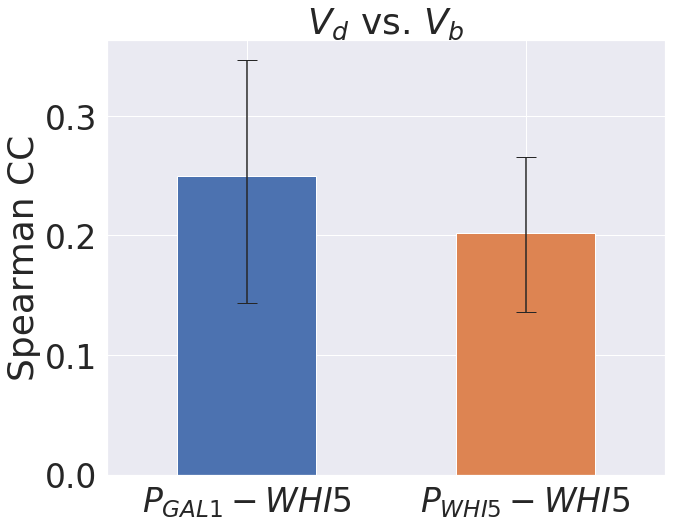

In [144]:
types = ['D']
sns.set(font_scale=3.0)
# plt.figure(figsize=[5,5])
full_types = ['Daughters']
labels = ['pGAL1-WHI5','pWHI5-WHI5']
legends = [r'$P_{GAL1}-WHI5$',r'$P_{WHI5}-WHI5$']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$V_{b,ell}$', '$V_{div,ell}$'
print x,y
vals = [[],[]]
zvals = []
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(legends[ind])
        v1=df.type==types[ind1]
        v2=df.genotype==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]), scipy.stats.spearmanr,alpha=0.05)
        vals[0].append(scipy.stats.spearmanr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        zvals.append([np.arctanh(vals[0][-1]),1/np.sqrt(len(df[v1 & v2][x])-3)])
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
temp2=np.reshape(np.asarray(vals[1]).transpose(),[1,2,2])
plot = temp1.plot(x='label',y='slope',kind='bar',legend=False,yerr=temp2,capsize=10.0, figsize=[10,8],grid=True,rot=False)
plt.title('$V_{d}$ vs. $V_b$')
# plt.legend(loc=[0.8,0.4])
# plt.xticks([])
plt.xlabel('')
plt.ylabel('Spearman CC')
fig=plot.get_figure()
ax=plt.gca()
print zvals  # these are the normally distributed pearson correlation coefficients
zobs=np.absolute((zvals[0][0]-zvals[1][0])/(np.sqrt(zvals[0][1]**2+zvals[1][1]**2)))
print zobs, np.sqrt(zvals[0][1]**2+zvals[1][1]**2)
print scipy.stats.norm.cdf(zobs)
if 0.025<scipy.stats.norm.cdf(zobs)<0.975:
    print 'This is not statistically significant'
else:
#     props = {'connectionstyle':'bar','arrowstyle':'-',\
#                  'shrinkA':20,'shrinkB':20,'linewidth':2}
#     ax.annotate('', xy=(0.0,0.5), xytext=(0.0,0.5), arrowprops=props)
    print 'This is a statistically significant difference'
plt.show()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/vd_vb_corr_full_timelapse_spearman.png',bbox_inches='tight', dpi=500)

$c1_{b,seg,norm}$ $t_{G1}$
pGAL1-WHI5 D
pWHI5-WHI5 D
[[0.38077535158213127, 0.053916386601719206], [0.30549745621106805, 0.03429971702850177]]
1.1780235953198719 0.06390185703421569
0.8806064001361716
This is not statistically significant


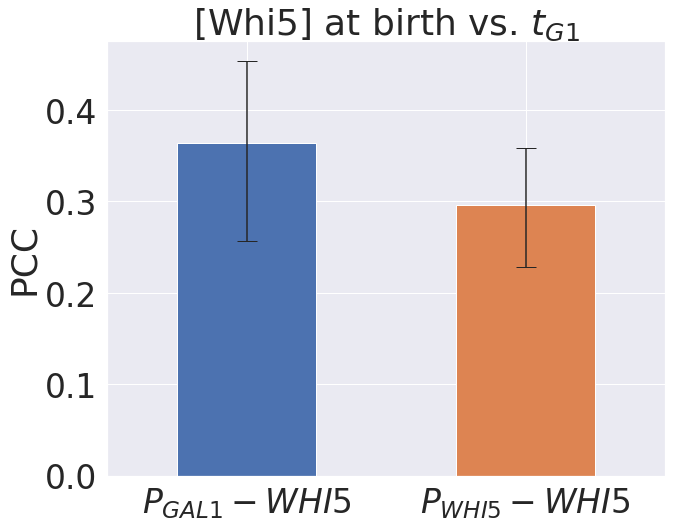

In [17]:
types = ['D']
sns.set(font_scale=3.0)
# plt.figure(figsize=[5,5])
full_types = ['Daughters']
labels = ['pGAL1-WHI5','pWHI5-WHI5']
legends = [r'$P_{GAL1}-WHI5$',r'$P_{WHI5}-WHI5$']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$c1_{b,seg,norm}$', '$t_{G1}$'
print x,y
vals = [[],[]]
zvals = []
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(legends[ind])
        v1=df.type==types[ind1]
        v2=df.genotype==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]), scipy.stats.pearsonr,alpha=0.05)
        vals[0].append(scipy.stats.pearsonr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        zvals.append([np.arctanh(vals[0][-1]),1/np.sqrt(len(df[v1 & v2][x])-3)])
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
temp2=np.reshape(np.asarray(vals[1]).transpose(),[1,2,2])
plot = temp1.plot(x='label',y='slope',kind='bar',legend=False,yerr=temp2,capsize=10.0, figsize=[10,8],grid=True,rot=False,color=current_palette[:2])
plt.title('[Whi5] at birth vs. $t_{G1}$')
# plt.legend(loc=[0.8,0.4])
# plt.xticks([])
plt.xlabel('')
plt.ylabel('PCC')
fig=plot.get_figure()
ax=plt.gca()
print zvals  # these are the normally distributed pearson correlation coefficients
zobs=np.absolute((zvals[0][0]-zvals[1][0])/(np.sqrt(zvals[0][1]**2+zvals[1][1]**2)))
print zobs, np.sqrt(zvals[0][1]**2+zvals[1][1]**2)
print scipy.stats.norm.cdf(zobs)
if 0.025<scipy.stats.norm.cdf(zobs)<0.975:
    print 'This is not statistically significant'
else:
#     props = {'connectionstyle':'bar','arrowstyle':'-',\
#                  'shrinkA':20,'shrinkB':20,'linewidth':2}
#     ax.annotate('', xy=(0.0,0.5), xytext=(0.0,0.5), arrowprops=props)
    print 'This is a statistically significant difference'
plt.show()
fig.savefig(save_path+'/size_regulation_perturbation/tg1_c1b_corr_full_timelapse.png',bbox_inches='tight', dpi=500)

$c1_{b,seg,norm}$ $t_{G1}$
pGAL1-WHI5 D
pWHI5-WHI5 D
[[0.3089962992265015, 0.053916386601719206], [0.3373771344411143, 0.03429971702850177]]
0.4441316188888923 0.06390185703421569
0.6715262862494722
This is not statistically significant


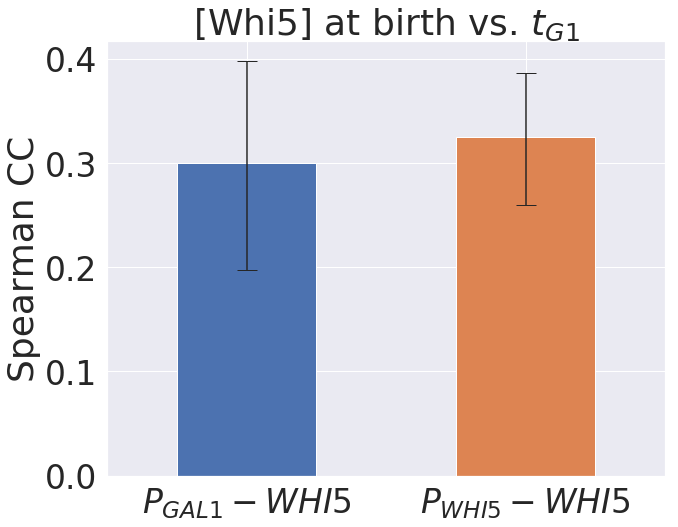

In [66]:
types = ['D']
sns.set(font_scale=3.0)
# plt.figure(figsize=[5,5])
full_types = ['Daughters']
labels = ['pGAL1-WHI5','pWHI5-WHI5']
legends = [r'$P_{GAL1}-WHI5$',r'$P_{WHI5}-WHI5$']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$c1_{b,seg,norm}$', '$t_{G1}$'
print x,y
vals = [[],[]]
zvals = []
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(legends[ind])
        v1=df.type==types[ind1]
        v2=df.genotype==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]), scipy.stats.spearmanr,alpha=0.05)
        vals[0].append(scipy.stats.spearmanr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        zvals.append([np.arctanh(vals[0][-1]),1/np.sqrt(len(df[v1 & v2][x])-3)])
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
temp2=np.reshape(np.asarray(vals[1]).transpose(),[1,2,2])
plot = temp1.plot(x='label',y='slope',kind='bar',legend=False,yerr=temp2,capsize=10.0, figsize=[10,8],grid=True,rot=False)
plt.title('[Whi5] at birth vs. $t_{G1}$')
# plt.legend(loc=[0.8,0.4])
# plt.xticks([])
plt.xlabel('')
plt.ylabel('Spearman CC')
fig=plot.get_figure()
ax=plt.gca()
print zvals  # these are the normally distributed pearson correlation coefficients
zobs=np.absolute((zvals[0][0]-zvals[1][0])/(np.sqrt(zvals[0][1]**2+zvals[1][1]**2)))
print zobs, np.sqrt(zvals[0][1]**2+zvals[1][1]**2)
print scipy.stats.norm.cdf(zobs)
if 0.025<scipy.stats.norm.cdf(zobs)<0.975:
    print 'This is not statistically significant'
else:
#     props = {'connectionstyle':'bar','arrowstyle':'-',\
#                  'shrinkA':20,'shrinkB':20,'linewidth':2}
#     ax.annotate('', xy=(0.0,0.5), xytext=(0.0,0.5), arrowprops=props)
    print 'This is a statistically significant difference'
plt.show()
fig.savefig('/home/felix/Dropbox/19_whi5_dilution_paper/plots/size_regulation_perturbation/tg1_c1b_corr_full_timelapse_spearmanr.png',bbox_inches='tight', dpi=500)

$c2_{b,seg,norm}$ $t_{G1}$
pGAL1-WHI5 D
pWHI5-WHI5 D
[[0.1295338000864064, 0.053916386601719206], [0.0022339351806759497, 0.03429971702850177]]
1.9921152657201942 0.06390185703421569
0.9768207938109486
This is a statistically significant difference


/home/felix/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:20: InstabilityWarning: Some values used extremal samples; results are probably unstable.


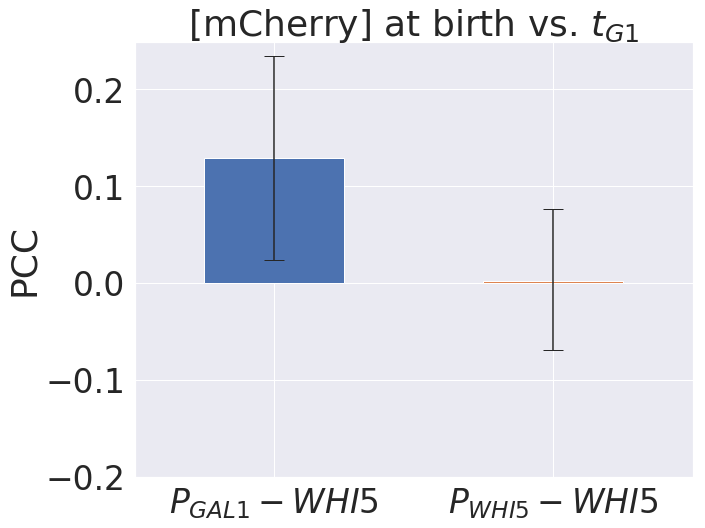

In [18]:
types = ['D']
sns.set(font_scale=3.0)
# plt.figure(figsize=[5,5])
full_types = ['Daughters']
labels = ['pGAL1-WHI5','pWHI5-WHI5']
legends = [r'$P_{GAL1}-WHI5$',r'$P_{WHI5}-WHI5$']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$c2_{b,seg,norm}$', '$t_{G1}$'
print x,y
vals = [[],[]]
zvals = []
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(legends[ind])
        v1=df.type==types[ind1]
        v2=df.genotype==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]), scipy.stats.pearsonr,alpha=0.05)
        vals[0].append(scipy.stats.pearsonr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        zvals.append([np.arctanh(vals[0][-1]),1/np.sqrt(len(df[v1 & v2][x])-3)])
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
temp2=np.reshape(np.asarray(vals[1]).transpose(),[1,2,2])
plot = temp1.plot(x='label',y='slope',kind='bar',legend=False,yerr=temp2,capsize=10.0, figsize=[10,8],grid=True,rot=False,color=current_palette[:2])
plt.title('[mCherry] at birth vs. $t_{G1}$')
# plt.legend(loc=[0.8,0.4])
# plt.xticks([])
plt.xlabel('')
plt.ylabel('PCC')
plt.ylim(ymin=-0.2)
fig=plot.get_figure()
ax=plt.gca()
print zvals  # these are the normally distributed pearson correlation coefficients
zobs=np.absolute((zvals[0][0]-zvals[1][0])/(np.sqrt(zvals[0][1]**2+zvals[1][1]**2)))
print zobs, np.sqrt(zvals[0][1]**2+zvals[1][1]**2)
print scipy.stats.norm.cdf(zobs)
if 0.025<scipy.stats.norm.cdf(zobs)<0.975:
    print 'This is not statistically significant'
else:
#     props = {'connectionstyle':'bar','arrowstyle':'-',\
#                  'shrinkA':20,'shrinkB':20,'linewidth':2}
#     ax.annotate('', xy=(0.0,0.5), xytext=(0.0,0.5), arrowprops=props)
    print 'This is a statistically significant difference'
plt.show()
fig.savefig(save_path+'/size_regulation_perturbation/tg1_c2b_corr_full_timelapse.png',bbox_inches='tight', dpi=500)

$c2_{b,seg,norm}$ $t_{G1}$
pGAL1-WHI5 D
pWHI5-WHI5 D
[[0.1453583225720281, 0.053916386601719206], [-0.02356243733080216, 0.03429971702850177]]
2.643440546843312 0.06390185703421569
0.9958965911517259
This is a statistically significant difference


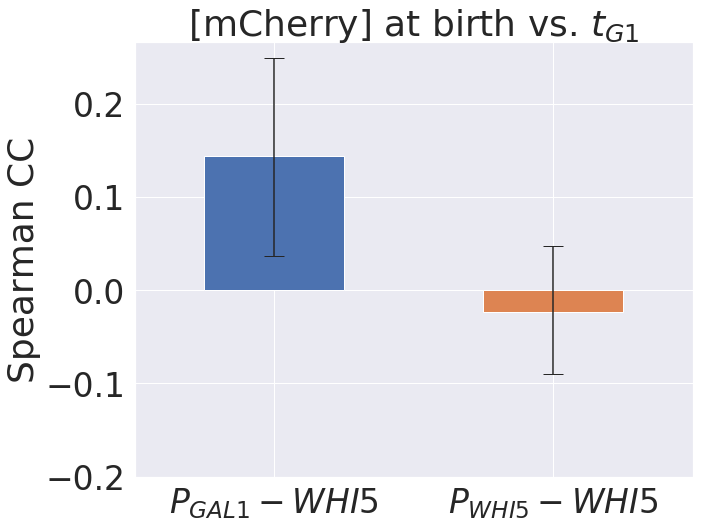

In [19]:
types = ['D']
sns.set(font_scale=3.0)
# plt.figure(figsize=[5,5])
full_types = ['Daughters']
labels = ['pGAL1-WHI5','pWHI5-WHI5']
legends = [r'$P_{GAL1}-WHI5$',r'$P_{WHI5}-WHI5$']
# labels = ['pGAL1-WHI5 11/14', 'pWHI5-WHI5 12/07']
# labels = ['pGAL1-WHI5 12/20', 'pWHI5-WHI5 4/17']
x, y = '$c2_{b,seg,norm}$', '$t_{G1}$'
print x,y
vals = [[],[]]
zvals = []
label = []
for ind1 in range(len(types)):
    for ind in range(len(labels)):
        print labels[ind], types[ind1]
        label.append(legends[ind])
        v1=df.type==types[ind1]
        v2=df.genotype==labels[ind]
        z = boot.ci((df[v1 & v2][x],df[v1 & v2][y]), scipy.stats.spearmanr,alpha=0.05)
        vals[0].append(scipy.stats.spearmanr(df[v1&v2][x], df[v1&v2][y])[0])
        vals[1].append([vals[0][-1]-z[0][0], z[1][0]-vals[0][-1]])
        zvals.append([np.arctanh(vals[0][-1]),1/np.sqrt(len(df[v1 & v2][x])-3)])
temp1 = pd.DataFrame(columns = ['slope', 'label'])
temp1['slope'] = vals[0]
temp1['label'] = label
temp2=np.reshape(np.asarray(vals[1]).transpose(),[1,2,2])
plot = temp1.plot(x='label',y='slope',kind='bar',legend=False,yerr=temp2,capsize=10.0, figsize=[10,8],grid=True,rot=False,color=current_palette[:2])
plt.title('[mCherry] at birth vs. $t_{G1}$')
# plt.legend(loc=[0.8,0.4])
# plt.xticks([])
plt.xlabel('')
plt.ylabel('Spearman CC')
plt.ylim(ymin=-0.2)
fig=plot.get_figure()
ax=plt.gca()
print zvals  # these are the normally distributed pearson correlation coefficients
zobs=np.absolute((zvals[0][0]-zvals[1][0])/(np.sqrt(zvals[0][1]**2+zvals[1][1]**2)))
print zobs, np.sqrt(zvals[0][1]**2+zvals[1][1]**2)
print scipy.stats.norm.cdf(zobs)
if 0.025<scipy.stats.norm.cdf(zobs)<0.975:
    print 'This is not statistically significant'
else:
#     props = {'connectionstyle':'bar','arrowstyle':'-',\
#                  'shrinkA':20,'shrinkB':20,'linewidth':2}
#     ax.annotate('', xy=(0.0,0.5), xytext=(0.0,0.5), arrowprops=props)
    print 'This is a statistically significant difference'
plt.show()
fig.savefig(save_path+'/size_regulation_perturbation/tg1_c2b_corr_full_timelapse_spearmanr.png',bbox_inches='tight', dpi=500)